# 用气泡图进行对比分析

### 1. 初始设置

首先，导入所需的库，并设置中文字体等。

In [1]:
# 导入所需的库
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as image

# 正常显示中文标签
mpl.rcParams['font.sans-serif'] = ['SimHei']

# 自动适应布局
mpl.rcParams.update({'figure.autolayout': True})

# 正常显示负号
mpl.rcParams['axes.unicode_minus'] = False

# 禁用科学计数法
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

# 定义颜色，主色：蓝色，辅助色：灰色，互补色：橙色
colors = {'蓝色':'#00589F', '深蓝色':'#003867', '浅蓝色':'#5D9BCF',
          '灰色':'#999999', '深灰色':'#666666', '浅灰色':'#CCCCCC',
          '橙色':'#F68F00', '深橙色':'#A05D00', '浅橙色':'#FBC171'}

### 2. 定义数据

In [2]:
# 数据源路径
filepath='./data/气泡图数据源.xlsx'

# 读取 Excel文件
df = pd.read_excel(filepath)

# 定义画图用的数据
x = df.点赞率
y = df.分享率
s = df.阅读量
labels = df.文章

### 3. 开始画图

用「**面向对象**」的方法画图。

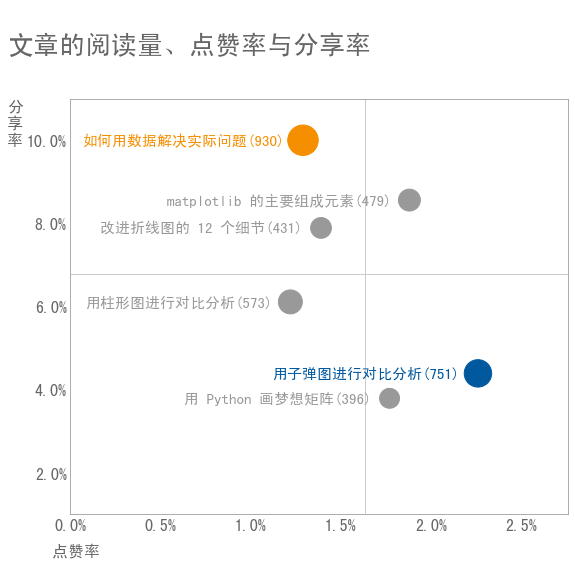

In [3]:
# 使用「面向对象」的方法画图，定义图片的大小
fig, ax = plt.subplots(figsize=(8, 8))

# 设置标题
ax.text(-0.0035, y.max()+0.015, '\n文章的阅读量、点赞率与分享率\n', fontsize=26, color=colors['深灰色'])

# 定义气泡的基础颜色
color = [colors['灰色']]*6
# 突出显示点赞率最高的气泡
color[x.idxmax()] = colors['蓝色']
# 突出显示分享率最高的气泡
color[y.idxmax()] = colors['橙色']

# 画气泡图
ax.scatter(x, y, s, c=color)

# 设置刻度范围
ax.set_xlim(0, x.max()+0.005)
ax.set_ylim(0.01, y.max()+0.01)

# 用百分比格式显示坐标轴
def to_percent(temp, position=1):
    return '%.1f'%(100 * temp) + '%'
formatter = mpl.ticker.FuncFormatter(to_percent)
ax.yaxis.set_major_formatter(formatter)
ax.xaxis.set_major_formatter(formatter)

# 设置 X、Y 轴的标题，适当留白
ax.text(-0.001, 0, '点赞率', ha='left', fontsize=16, color=colors['深灰色'])
ax.text(-0.0035, y.max()+0.01, '分\n享\n率', va='top', fontsize=16, color=colors['深灰色'])

# 平均值线
ax.hlines(y.mean(), 0, 1, color=colors['浅灰色'], lw=1)
ax.vlines(x.mean(), 0, 1, color=colors['浅灰色'], lw=1)

# 显示标签
for i, a, b, c, d in zip(np.arange(len(x)), x, y, labels, s):
    ax.text(a-0.001, b, c+'('+str(d)+')', ha='right', va='center', fontsize=15, color=color[i])

# 设置边框颜色
ax.spines['top'].set_color(colors['灰色'])
ax.spines['bottom'].set_color(colors['灰色'])
ax.spines['left'].set_color(colors['灰色'])
ax.spines['right'].set_color(colors['灰色'])

# 隐藏刻度线
ax.tick_params(axis='x', which='major', length=0)
ax.tick_params(axis='y', which='major', length=0)

# 设置坐标标签字体大小和颜色
ax.tick_params(labelsize=16, colors=colors['深灰色'])

plt.show()